In [73]:
import pandas as pd

In [74]:
file_path = 'plastic-production.csv'
plastic_production_df = pd.read_csv(file_path)

In [75]:
yearly_production = plastic_production_df.groupby('Time')['Value'].sum()

In [76]:
print("Yearly Sum of Plastic Production:")
print(yearly_production)

Yearly Sum of Plastic Production:
Time
1990    259.776
1991    269.740
1992    287.139
1993    299.370
1994    328.894
1995    341.835
1996    366.879
1997    394.456
1998    412.794
1999    444.289
2000    468.015
2001    479.814
2002    510.960
2003    532.647
2004    567.016
2005    583.575
2006    620.932
2007    656.232
2008    625.818
2009    642.339
2010    697.761
2011    726.539
2012    754.603
2013    787.471
2014    802.064
2015    825.503
2016    839.940
2017    864.369
2018    892.398
2019    919.493
Name: Value, dtype: float64


In [77]:
total_production = yearly_production.sum()

In [78]:
total_production_check = plastic_production_df['Value'].sum()
precision_check = abs(total_production - total_production_check)< 1e-3

In [79]:
print("Total Production from Yearly Sums:", total_production)
print("Total Production from Dataset Sum:", total_production_check)
print("Precision Check Passed:", precision_check)

Total Production from Yearly Sums: 17202.661
Total Production from Dataset Sum: 17202.661
Precision Check Passed: True


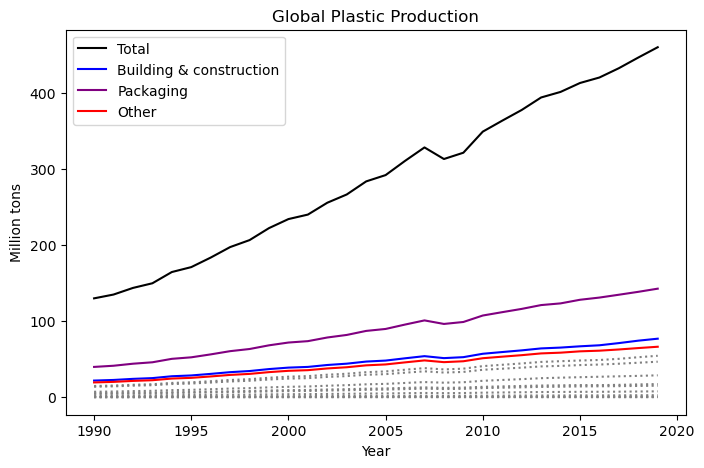

In [80]:
plastic_production_df = pd.read_csv('plastic-production.csv')

pivot_data = plastic_production_df.pivot_table(values='Value', index='Time', columns='Applications', aggfunc='sum')

plt.figure(figsize=(8, 5))

sector_styles = {
    'Building & construction': {'color': 'blue', 'linestyle': '-'},
    'Packaging': {'color': 'purple', 'linestyle': '-'},
    'Other': {'color': 'red', 'linestyle': '-'},
    'Total': {'color': 'black', 'linestyle': '-'}  # Assuming 'Total' is pre-calculated in the dataset
}

default_style = {'color': 'grey', 'linestyle': ':'}

for sector in pivot_data.columns:
    style = sector_styles.get(sector, default_style)
    plt.plot(pivot_data.index, pivot_data[sector], label=sector, **style)

legend_order = ['Total', 'Building & construction', 'Packaging', 'Other']

custom_handles = [plt.Line2D([], [], color=sector_styles[sector]['color'],
                             linestyle=sector_styles[sector]['linestyle'], label=sector)
                  for sector in legend_order]

plt.legend(handles=custom_handles, loc='upper left')

plt.xlabel('Year')
plt.ylabel('Million tons')
plt.title('Global Plastic Production')

plt.show()

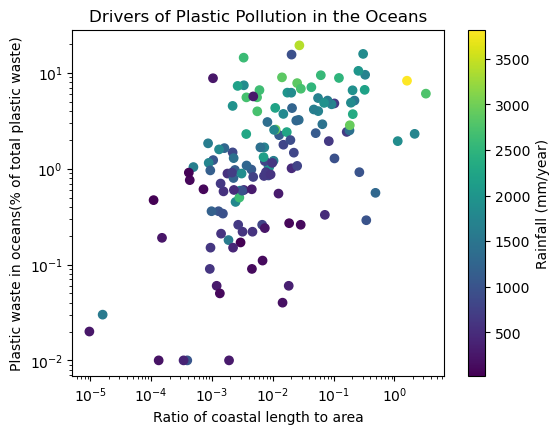

In [81]:
river_plastics_data = pd.read_csv('river-plastics.csv')

river_plastics_data['Ratio of coastal length to area'] = river_plastics_data['Coast length'] / river_plastics_data['Area']

fig, ax = plt.subplots(figsize=(6, 4.5))  

scatter = ax.scatter(
    river_plastics_data['Ratio of coastal length to area'],
    river_plastics_data['Ratio ME/MPW'],  
    c=river_plastics_data['Rainfall'],    
    cmap='viridis',                       
    alpha=1.0                           
)

ax.set_xscale('log')
ax.set_yscale('log')

colorbar = fig.colorbar(scatter)
colorbar.set_label('Rainfall (mm/year)')

ax.set_xlabel('Ratio of coastal length to area')
ax.set_ylabel('Plastic waste in oceans(% of total plastic waste)')
ax.set_title('Drivers of Plastic Pollution in the Oceans')

plt.show()